<a href="https://www.kaggle.com/code/yorkyong/obesity-risk-feature-engineering-ensemble?scriptVersionId=162684056" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>1 |</span></b> <b>INTRODUCTION</b></div>

### <b><span style='color:#FFCE30'> 1.1 |</span> Purpose</b>
We use this notebook to build on the EDA done here and to beat the Obesity Risk | XGBoost Baseline notebook

- EDA: https://www.kaggle.com/code/yorkyong/obesity-risk-eda
- XGBoost Baseline: https://www.kaggle.com/code/yorkyong/obesity-risk-xgboost-baseline

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>2 |</span></b> <b>LOAD LIBRARY & DATA</b></div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Set the display options to show all columns without truncation
pd.set_option('display.max_columns', None)

In [2]:
#Load the data
train = pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv", index_col ='id')
test = pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv", index_col ='id')
submit = pd.read_csv("/kaggle/input/playground-series-s4e2/sample_submission.csv")

In [3]:
train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  FAF                             20758

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13840 entries, 20758 to 34597
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          13840 non-null  object 
 1   Age                             13840 non-null  float64
 2   Height                          13840 non-null  float64
 3   Weight                          13840 non-null  float64
 4   family_history_with_overweight  13840 non-null  object 
 5   FAVC                            13840 non-null  object 
 6   FCVC                            13840 non-null  float64
 7   NCP                             13840 non-null  float64
 8   CAEC                            13840 non-null  object 
 9   SMOKE                           13840 non-null  object 
 10  CH2O                            13840 non-null  float64
 11  SCC                             13840 non-null  object 
 12  FAF                             1

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>3A |</span></b> <b>FEATURE ENGINEERING</b></div>

### <b><span style='color:#FFCE30'> 3A.1 |</span> Body Mass Index</b>
- BMI (Body Mass Index): BMI is a common feature used to assess obesity
- Calculate BMI using the formula: BMI = Weight (kg) / (Height (m) * Height (m))

In [6]:
# Calculate BMI (Weight (kg) / (Height (m) * Height (m))) and add it as a new column
train['BMI'] = train['Weight'] / (train['Height'] ** 2)
test['BMI'] = test['Weight'] / (test['Height'] ** 2)

train

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
id,,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II,36.587084
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,17.099278
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II,31.889841


In [7]:
from sklearn.base import BaseEstimator, TransformerMixin

In [8]:
class BMIBinner(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy['BMI_Category'] = pd.cut(X_copy['BMI'],
                                        bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')],
                                        labels=['Underweight', 'Normal', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III'],
                                        right=False)
        return X_copy
    
BMIBinner().fit_transform(train)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,BMI_Category
id,,,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565,Overweight
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091,Normal
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706,Underweight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798,Obesity III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II,36.587084,Obesity II
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,17.099278,Underweight
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II,31.889841,Obesity I


### <b><span style='color:#FFCE30'> 3A.2 |</span> Age Binning </b>
- Age Group: Categorize ages into groups or bins to capture potential age-related patterns.

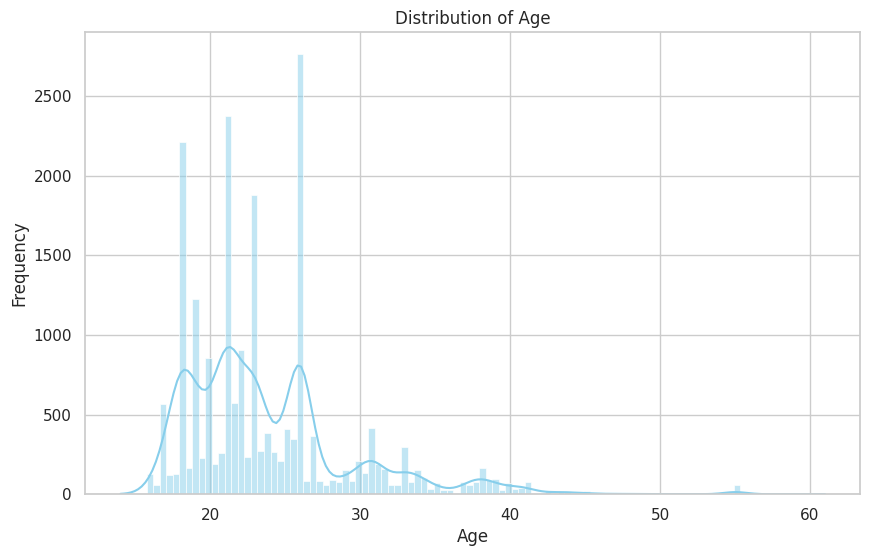

In [9]:
sns.set(style="whitegrid")  # Set the style of the plot

# Create the distribution plot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(train['Age'], kde=True, color='skyblue')  # Create the distplot with KDE
plt.title('Distribution of Age')  # Set the title of the plot
plt.xlabel('Age')  # Set the label for the x-axis
plt.ylabel('Frequency')  # Set the label for the y-axis
plt.show()  # Show the plot

In [10]:
class AgeBinning(BaseEstimator, TransformerMixin):
    def __init__(self, n_bins):
        self.n_bins = n_bins
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        transformed = pd.qcut(X['Age'], self.n_bins, labels=False)
        transformed[transformed.isna()] = 0
        transformed_series = pd.Series(transformed, 
                                       name=f'QCut{self.n_bins}_Age',
                                       index=X.index)
        X_copy = X.copy()
        return pd.concat([X_copy, transformed_series], axis=1)
        
AgeBinning(5).fit_transform(train)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,QCut5_Age
id,,,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565,3
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091,0
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706,0
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798,1
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II,36.587084,3
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,17.099278,0
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II,31.889841,1


### <b><span style='color:#FFCE30'> 3A.3 |</span> Eating Habits: FAVC_FCVC_CH2O Interactions </b>
- Meal Habits: Combine features like 'FAVC' (frequent consumption of high-calorie food), 'FCVC' (frequency of vegetables consumption) and 'CH2O' (Water consumption) into a single feature using Kmeans clustering to represent overall eating habits.

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, StandardScaler,RobustScaler
from sklearn.decomposition import PCA

In [12]:
class KMeansClusterer(BaseEstimator, TransformerMixin):
    def __init__(self, features, n_clusters=20, random_state=0, n_components=None):
        self.features = features
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.n_components = n_components
        self.kmeans = KMeans(n_clusters=n_clusters, n_init=50, random_state=random_state)
        self.scaler = StandardScaler()
        self.pca = PCA(n_components=n_components)
    
    def fit(self, X, y=None):
        X_scaled = self.scaler.fit_transform(X.loc[:, self.features])
        if self.n_components is not None:
            X_scaled = self.pca.fit_transform(X_scaled)
        self.kmeans.fit(X_scaled)
        return self
    
    def transform(self, X):
        X_scaled = self.scaler.transform(X.loc[:, self.features])
        
        # Check for NaN values and replace them with zeros or appropriate values
        if np.isnan(X_scaled).any():
            X_scaled = np.nan_to_num(X_scaled)
        
        if self.n_components is not None:
            X_scaled = self.pca.transform(X_scaled)
        
        X_new = pd.DataFrame()
        X_new["Cluster"] = self.kmeans.predict(X_scaled)
        
        X_copy = X.copy()
        # Convert the "Cluster" column to dense format
        X_new["Cluster"] = X_new["Cluster"].values
        return pd.concat([X_copy.reset_index(drop=True), X_new.reset_index(drop=True)], axis=1)

In [13]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform 'FAVC' column
train['FAVC_encoded'] = label_encoder.fit_transform(train['FAVC'])
test['FAVC_encoded'] = label_encoder.fit_transform(test['FAVC'])

- We choose to use 12 clusters, which is twice the number of target classes, as an experimental approach to determine if K-means clustering can generate valuable features.

In [14]:
#With PCA (specify the number of components, e.g., 3)
clusterer_with_pca = KMeansClusterer(features=['FAF',"FCVC","CH2O"], n_clusters=12, random_state=123, n_components=3)

# Fit and transform your data
clusterer_with_pca.fit_transform(train)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,FAVC_encoded,Cluster
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565,1,9
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091,1,6
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706,1,6
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798,1,0
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II,36.587084,1,0
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,17.099278,1,4
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II,31.889841,1,6
20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II,28.899693,1,5


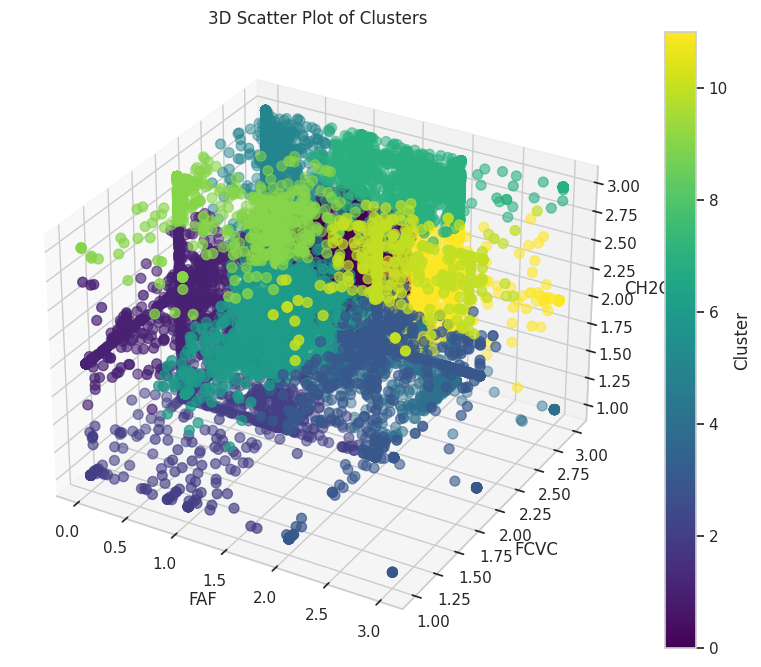

In [15]:
#Visualising the clusters
from mpl_toolkits.mplot3d import Axes3D

# Assuming X_train is your training data
X_train_selected = train[['FAF',"FCVC","CH2O"]]

# Fit and transform with PCA and KMeansClusterer
clusterer_with_pca.fit(X_train_selected)
X_transformed = clusterer_with_pca.transform(X_train_selected)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of data points colored by cluster
scatter = ax.scatter(X_transformed["FAF"], X_transformed["FCVC"], X_transformed["CH2O"], c=X_transformed["Cluster"], cmap='viridis', s=50)

# Add labels and title
ax.set_xlabel("FAF")
ax.set_ylabel("FCVC")
ax.set_zlabel("CH2O")
ax.set_title('3D Scatter Plot of Clusters')

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')

plt.show()

### <b><span style='color:#FFCE30'> 3A.4 |</span> Physical Activity levels: FAF & TUE Interactions </b>

- Physical Activity Level: Create a feature based on 'FAF' (Physical activity frequency) and 'TUE' (Time using technology devices) to represent physical activity levels.
- To model the relationship between 'FAF' (Physical activity frequency) and 'TUE' (Time using technology devices) in the opposite direction, you should subtract 'TUE' from 'FAF' to create a new feature called 'PhysicalActivity' rather than adding them together. 

In [16]:
class PhysicalActivityTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        X_copy['PhysicalActivity'] = (X_copy['FAF'] - X_copy['TUE']) * 1000
        return X_copy

PhysicalActivityTransformer().fit_transform(train)   

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,FAVC_encoded,PhysicalActivity
id,,,,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565,1,-976.473
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091,1,0.000
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706,1,-807.539
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798,1,687.664
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151,1,1036.252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II,36.587084,1,1133.839
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,17.099278,1,1000.000
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II,31.889841,1,-40.399


### <b><span style='color:#FFCE30'> 3A.5 |</span> H2O Binning </b>
- Hydration Level: Use 'CH2O' (Water consumption) to categorize individuals into 'Low,' 'Moderate,' or 'High' hydration categories or 3 bins.

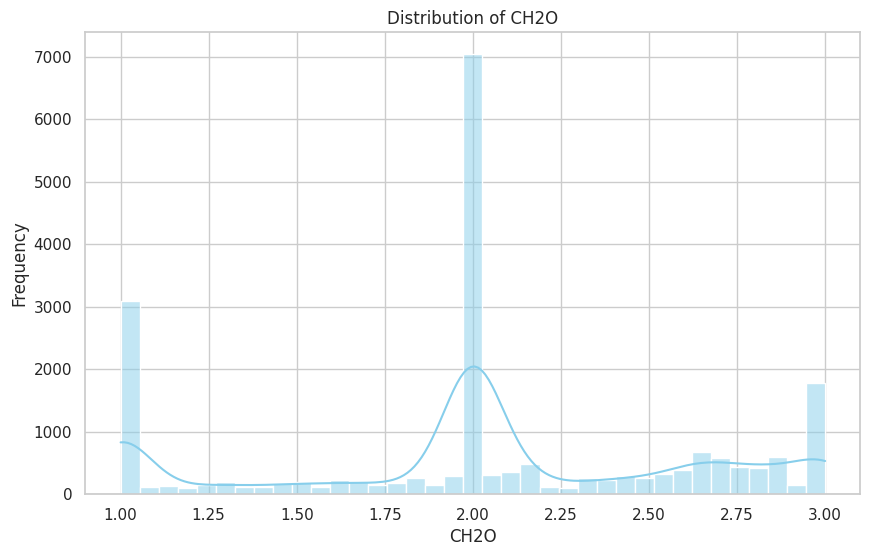

In [17]:
sns.set(style="whitegrid")  # Set the style of the plot

# Create the distribution plot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(train['CH2O'], kde=True, color='skyblue')  # Create the distplot with KDE
plt.title('Distribution of CH2O')  # Set the title of the plot
plt.xlabel('CH2O')  # Set the label for the x-axis
plt.ylabel('Frequency')  # Set the label for the y-axis
plt.show()  # Show the plot

In [18]:
class H2OBinning(BaseEstimator, TransformerMixin):
    def __init__(self, n_bins):
        self.n_bins = n_bins
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        transformed = pd.qcut(X['CH2O'], self.n_bins, labels=False)
        transformed[transformed.isna()] = 0
        transformed_series = pd.Series(transformed, 
                                       name=f'QCut{self.n_bins}_CH2O',
                                       index=X.index)
        X_copy = X.copy()
        return pd.concat([X_copy, transformed_series], axis=1)
        
H2OBinning(3).fit_transform(train)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,FAVC_encoded,QCut3_CH2O
id,,,,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565,1,2
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091,1,0
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706,1,0
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798,1,0
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II,36.587084,1,1
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,17.099278,1,0
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II,31.889841,1,0


### <b><span style='color:#FFCE30'> 3A.6 |</span> Nutrition Habits: CAEC & CALC Interactions </b>

- Nutrition Habits: Combine features like 'CAEC' (Consumption of food between meals) and 'CALC' (Consumption of alcohol) to represent overall nutrition habits.

In [19]:
class NutritionHabitsTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        X_copy['NutritionHabits'] = X_copy['CAEC'] + '_' + X_copy['CALC']
        return X_copy
    
NutritionHabitsTransformer().fit_transform(train)   

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,FAVC_encoded,NutritionHabits
id,,,,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565,1,Sometimes_Sometimes
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091,1,Frequently_no
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706,1,Sometimes_no
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798,1,Sometimes_Sometimes
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151,1,Sometimes_Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II,36.587084,1,Sometimes_Sometimes
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,17.099278,1,Frequently_Sometimes
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II,31.889841,1,Sometimes_no


### <b><span style='color:#FFCE30'> 3A.7 |</span> Age_Gender Interaction </b>
- Interaction Features: Create interaction features between variables that are likely to have a combined effect on obesity, such as 'Age' and 'Gender,'

In [20]:
class AgeGenderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, age_field='Age', gender_field='Gender'):
        self.age_field = age_field
        self.gender_field = gender_field
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        X_copy['Age_Gender'] = X_copy[self.age_field].round().astype('int').astype('str') + X_copy[self.gender_field]
        return X_copy

train_ag = AgeGenderTransformer().fit_transform(train)   
AgeGenderTransformer().fit_transform(train_ag)    

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,FAVC_encoded,Age_Gender
id,,,,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565,1,24Male
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091,1,18Female
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706,1,18Female
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798,1,21Female
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151,1,32Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II,36.587084,1,25Male
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,17.099278,1,18Male
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II,31.889841,1,20Male


### <b><span style='color:#FFCE30'> 3A.8 |</span> Age_Rounding </b>

In [21]:
class AgeRounder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy['Age'] = (X_copy['Age'] * 100).astype(np.uint16) / 100.0
        return X_copy
    
AgeRounder().fit_transform(train)   

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,FAVC_encoded
id,,,,,,,,,,,,,,,,,,,
0,Male,24.44,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565,1
1,Female,18.00,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091,1
2,Female,18.00,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706,1
3,Female,20.95,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798,1
4,Male,31.64,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.13,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II,36.587084,1
20754,Male,18.00,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,17.099278,1
20755,Male,20.10,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II,31.889841,1


### <b><span style='color:#FFCE30'> 3A.8 |</span> Height_Rounding </b>

In [22]:
class HeightRounder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy['Height'] = (X_copy['Height'] * 100).astype(np.uint16) / 100.0
        return X_copy
    
HeightRounder().fit_transform(train)   

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,FAVC_encoded
id,,,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.69,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565,1
1,Female,18.000000,1.56,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091,1
2,Female,18.000000,1.71,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706,1
3,Female,20.952737,1.71,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798,1
4,Male,31.641081,1.91,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.76,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II,36.587084,1
20754,Male,18.000000,1.71,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,17.099278,1
20755,Male,20.101026,1.81,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II,31.889841,1


### <b><span style='color:#FFCE30'> 3A.9 |</span> Weight_Rounding </b>

In [23]:
class WeightRounder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy['Weight'] = (X_copy['Weight'] * 100).astype(np.uint16) / 100.0
        return X_copy
    
WeightRounder().fit_transform(train)   

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,FAVC_encoded
id,,,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.66,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565,1
1,Female,18.000000,1.560000,57.00,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091,1
2,Female,18.000000,1.711460,50.16,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706,1
3,Female,20.952737,1.710730,131.27,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798,1
4,Male,31.641081,1.914186,93.79,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.18,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II,36.587084,1
20754,Male,18.000000,1.710000,50.00,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,17.099278,1
20755,Male,20.101026,1.819557,105.58,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II,31.889841,1


### <b><span style='color:#FFCE30'> 3A.10 |</span> Columns_Rounding </b>

In [24]:
class ColRounder(BaseEstimator, TransformerMixin):
    def __init__(self, cols_to_round):
        self.cols_to_round = cols_to_round

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in self.cols_to_round:
            X_copy[col] = round(X_copy[col])
            X_copy[col] = X_copy[col].astype('int')
        return X_copy
    
ColRounder(['FCVC',"NCP","CH2O","FAF","TUE"]).fit_transform(train)   

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,FAVC_encoded
id,,,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2,3,Sometimes,no,3,no,0,1,Sometimes,Public_Transportation,Overweight_Level_II,28.259565,1
1,Female,18.000000,1.560000,57.000000,yes,yes,2,3,Frequently,no,2,no,1,1,no,Automobile,Normal_Weight,23.422091,1
2,Female,18.000000,1.711460,50.165754,yes,yes,2,1,Sometimes,no,2,no,1,2,no,Public_Transportation,Insufficient_Weight,17.126706,1
3,Female,20.952737,1.710730,131.274851,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III,44.855798,1
4,Male,31.641081,1.914186,93.798055,yes,yes,3,2,Sometimes,no,2,no,2,1,Sometimes,Public_Transportation,Overweight_Level_II,25.599151,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,3,3,Sometimes,no,2,no,1,0,Sometimes,Public_Transportation,Obesity_Type_II,36.587084,1
20754,Male,18.000000,1.710000,50.000000,no,yes,3,4,Frequently,no,1,no,2,1,Sometimes,Public_Transportation,Insufficient_Weight,17.099278,1
20755,Male,20.101026,1.819557,105.580491,yes,yes,2,3,Sometimes,no,2,no,1,1,no,Public_Transportation,Obesity_Type_II,31.889841,1


### <b><span style='color:#FFCE30'> 3A.11 |</span> Columns_Dropper </b>

In [25]:
class DropColumn(BaseEstimator, TransformerMixin):
    def __init__(self, cols=[]):
        self.cols = cols
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        
        return X.drop(self.cols, axis=1)

DropColumn(cols=['MTRANS']).fit_transform(train)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,BMI,FAVC_encoded
id,,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Overweight_Level_II,28.259565,1
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Normal_Weight,23.422091,1
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Insufficient_Weight,17.126706,1
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Obesity_Type_III,44.855798,1
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Overweight_Level_II,25.599151,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Obesity_Type_II,36.587084,1
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Insufficient_Weight,17.099278,1
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Obesity_Type_II,31.889841,1


# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>3B |</span></b> <b>ASSEMBLE PIPELINE</b></div>

In [26]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler,RobustScaler,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline

In [27]:
#applies transformers to different columns.
multicolumn_prep = ColumnTransformer([ ('encode', 
                                       OneHotEncoder(handle_unknown='ignore'), 
                                       ['Gender', 'family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS']),
                                     ],
                                     remainder='passthrough')
multicolumn_prep

ColumnTransformer(remainder='passthrough',
                  transformers=[('encode',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Gender', 'family_history_with_overweight',
                                  'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC',
                                  'MTRANS'])])

In [28]:
class MinMaxScalerForNumeric(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = MinMaxScaler()

    def fit(self, X, y=None):
        # Select numeric columns
        self.numeric_cols = X.select_dtypes(include=['number']).columns
        # Fit the scaler on the numeric data
        self.scaler.fit(X[self.numeric_cols], y)
        return self

    def transform(self, X, y=None):
        # Transform only the numeric columns and leave others unchanged
        X_copy = X.copy()
        X_copy[self.numeric_cols] = self.scaler.transform(X[self.numeric_cols])
        return X_copy

In [29]:
# Using Standard Scaler or Robust Scaler to scale numeric variables

class StandardScalerNamed(StandardScaler, TransformerMixin):
    def get_feature_names_out(self, X, y=None):
        return X.columns.tolist()

    def transform(self, X, y=None):
        transformed = super().transform(X, y)
        return pd.DataFrame(transformed, columns=X.columns)
    
    
class RobustScalerNamed(RobustScaler, TransformerMixin):
    def get_feature_names_out(self, X, y=None):
        return X.columns.tolist()

    def transform(self, X, y=None):
        transformed = super().transform(X, y)
        return pd.DataFrame(transformed, columns=X.columns)

In [30]:
named_preprocessing_pipeline = Pipeline([
    ('age_binning', AgeBinning(10)),
    #('kmeans', KMeansClusterer(features=['FAF',"FCVC","CH2O"], n_clusters=12, random_state=2024, n_components=3)),
    ('physical_activity', PhysicalActivityTransformer()),
    #('H2O_binning', H2OBinning(3)),
    #('nutrition_habits', NutritionHabitsTransformer()),
    ('BMI_binning', BMIBinner()),
    ('age_gender', AgeGenderTransformer()),
    #('age_rounder', AgeRounder()),
    #('height_rounder', HeightRounder()),
    #('weight_rounder', WeightRounder()),
    #('col_rounder', ColRounder(['FCVC',"NCP","CH2O","FAF","TUE"])),
    ('drop', DropColumn(cols=['MTRANS',
                              'CALC',
                              'SCC',
                              'SMOKE',
                              'CAEC',
                              'family_history_with_overweight',
                              'FAVC'
        
        
    ])),
    ('prep',ColumnTransformer([ ('encode', 
                                 OneHotEncoder(handle_unknown='ignore',sparse_output=False), 
                                 ['Gender', 
                                  #'family_history_with_overweight',
                                  #'FAVC',
                                  #'CAEC',
                                  #'SMOKE',
                                  #'SCC',
                                  #'CALC',
                                  #'MTRANS',
                                  #'NutritionHabits',
                                  'Age_Gender',
                                  #'Cluster',
                                  'QCut10_Age',
                                  #'QCut3_CH2O',
                                  'BMI_Category']),
                              ],
                              remainder='passthrough').set_output(transform='pandas')),
])

named_preprocessing_pipeline      

Pipeline(steps=[('age_binning', AgeBinning(n_bins=10)),
                ('physical_activity', PhysicalActivityTransformer()),
                ('BMI_binning', BMIBinner()),
                ('age_gender', AgeGenderTransformer()),
                ('drop',
                 DropColumn(cols=['MTRANS', 'CALC', 'SCC', 'SMOKE', 'CAEC',
                                  'family_history_with_overweight', 'FAVC'])),
                ('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encode',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'Age_Gender',
                                                   'QCut10_Age',
                                                   'BMI_Category'])]))])

In [31]:
modelling_pipeline = Pipeline(named_preprocessing_pipeline.steps + [('scale',RobustScaler().set_output(transform='pandas')),])
modelling_pipeline

Pipeline(steps=[('age_binning', AgeBinning(n_bins=10)),
                ('physical_activity', PhysicalActivityTransformer()),
                ('BMI_binning', BMIBinner()),
                ('age_gender', AgeGenderTransformer()),
                ('drop',
                 DropColumn(cols=['MTRANS', 'CALC', 'SCC', 'SMOKE', 'CAEC',
                                  'family_history_with_overweight', 'FAVC'])),
                ('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encode',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'Age_Gender',
                                                   'QCut10_Age',
                                                   'BMI_Category'])])),
                ('scale', RobustScaler())])

In [32]:
train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,FAVC_encoded
id,,,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565,1
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091,1
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706,1
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798,1
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151,1


In [33]:
#checking output on X_train df
df_train = modelling_pipeline.fit_transform(train.drop(['NObeyesdad'], axis=1))
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20758 entries, 0 to 20757
Columns: 106 entries, encode__Gender_Female to remainder__PhysicalActivity
dtypes: float64(106)
memory usage: 16.9 MB


In [34]:
#checking output on X_test df
df_test = pd.DataFrame(modelling_pipeline.transform(test))
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13840 entries, 20758 to 34597
Columns: 106 entries, encode__Gender_Female to remainder__PhysicalActivity
dtypes: float64(106)
memory usage: 11.3 MB


# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>4 |</span></b> <b>MODELLING</b></div>

### <b><span style='color:#FFCE30'> 4.1 |</span> XGBoost</b>

In [35]:
#XGBoost best parameters 
xgb_params_optuna = {'max_depth': 5, 
                     'min_child_weight': 1, 
                     'learning_rate': 0.031512668734601325, 
                     'n_estimators': 992, 
                     'subsample': 0.392801872832444, 
                     'colsample_bytree': 0.5726150737652628, 
                     'random_state': 42}

In [36]:
from xgboost import XGBClassifier

# Create a XGBClassifier
XGB_classifier = XGBClassifier(**xgb_params_optuna)

XGB_pipeline = make_pipeline(modelling_pipeline, XGB_classifier)
XGB_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('age_binning', AgeBinning(n_bins=10)),
                                 ('physical_activity',
                                  PhysicalActivityTransformer()),
                                 ('BMI_binning', BMIBinner()),
                                 ('age_gender', AgeGenderTransformer()),
                                 ('drop',
                                  DropColumn(cols=['MTRANS', 'CALC', 'SCC',
                                                   'SMOKE', 'CAEC',
                                                   'family_history_with_overweight',
                                                   'FAVC'])),
                                 ('prep',
                                  ColumnTransformer(remainder='passthro...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.031512668734601325, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=5,
                               max_leaves=None, min_child_weight=1, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=992, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [37]:
trainX = train.drop(['NObeyesdad'], axis=1) 
trainy = train['NObeyesdad']

In [38]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
trainy_encoded = label_encoder.fit_transform(trainy)

trainy_encoded

array([6, 1, 0, ..., 3, 6, 3])

In [39]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import accuracy_score

# # Number of folds
# n_splits = 10

# # StratifiedKFold
# stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# # Cross-validation results
# cv_results = []

# # Stratified k-fold cross-validation
# for fold, (train_idx, val_idx) in enumerate(stratkf.split(trainX, trainy_encoded)):
#     X_train_fold, X_val_fold = trainX.iloc[train_idx], trainX.iloc[val_idx]
#     y_train_fold, y_val_fold = trainy_encoded[train_idx], trainy_encoded[val_idx]

#     # Create and fit the XGBoostClassifier on the training fold
#     XGB_pipeline.fit(X_train_fold, y_train_fold)

#     # Predictions on the validation fold
#     y_pred = XGB_pipeline.predict(X_val_fold)

#     # Calculate accuracy score
#     accuracy = accuracy_score(y_val_fold, y_pred)

#     # Print and store the results
#     print(f'Fold {fold + 1}, Accuracy Score on Validation Set: {accuracy}')
#     print('-' * 70)

#     cv_results.append(accuracy)

# # Average cross-validation result
# average_cv_result = sum(cv_results) / n_splits
# print(f'\nAverage Accuracy Score across {n_splits} folds: {average_cv_result}')


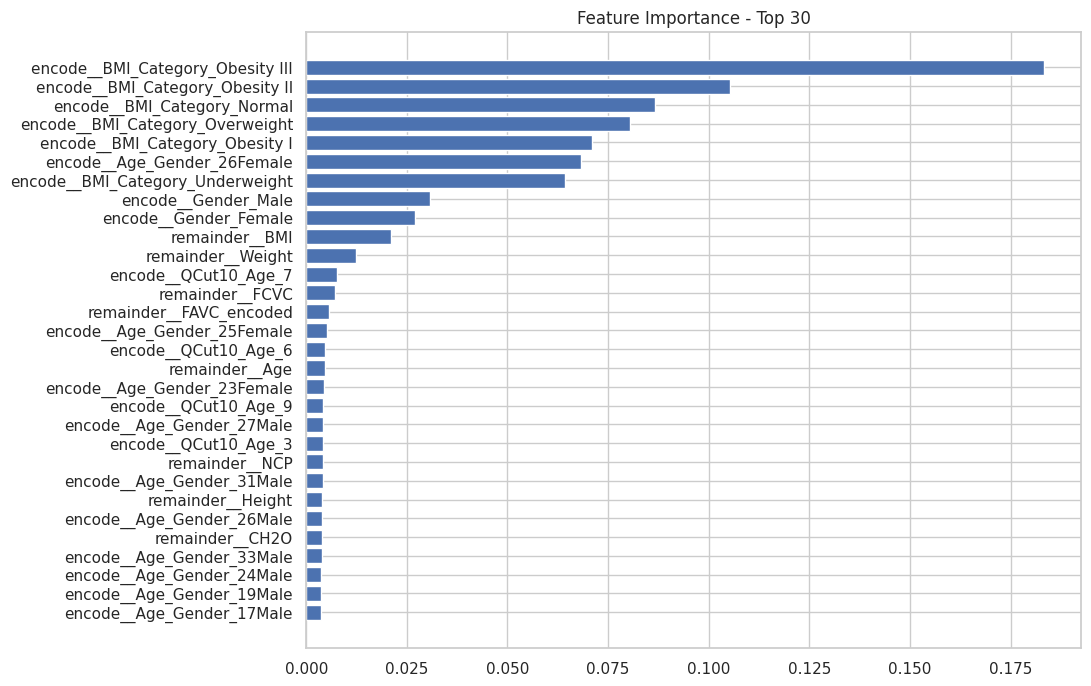

In [40]:
XGB_pipeline.fit(trainX, trainy_encoded)

TOP = 30

feature_importance = XGB_classifier.feature_importances_

# Get the feature names from 'train'
feature_names = df_train.columns

# Sort the feature importances and get the indices of the sorted array
sorted_idx = np.argsort(feature_importance)

# Plot only the top 'TOP' features
fig = plt.figure(figsize=(10, 8))
plt.barh(np.arange(len(sorted_idx))[-TOP:], feature_importance[sorted_idx][-TOP:], align='center')
plt.yticks(np.arange(len(sorted_idx))[-TOP:], feature_names[sorted_idx][-TOP:])
plt.title(f'Feature Importance - Top {TOP}')
plt.show()

### <b><span style='color:#FFCE30'> 4.2 |</span> LGBM</b>

In [41]:
#LGBM Best parameters:  
lgbm_params_optuna =  {'max_depth': 10, 
                       'min_child_samples': 2, 
                       'learning_rate': 0.06283911777512508, 
                       'n_estimators': 167, 
                       'subsample': 0.15876465004304768, 
                       'colsample_bytree': 0.3382036001685795, 
                       'reg_alpha': 0.7783349157695678, 
                       'reg_lambda': 0.5155230820613285}

In [42]:
#lgb library
import lightgbm as lgb
from lightgbm import LGBMClassifier


# lgbm model
lgbm_model = LGBMClassifier(**lgbm_params_optuna )

lgbm_pipeline = make_pipeline(modelling_pipeline, lgbm_model)
lgbm_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('age_binning', AgeBinning(n_bins=10)),
                                 ('physical_activity',
                                  PhysicalActivityTransformer()),
                                 ('BMI_binning', BMIBinner()),
                                 ('age_gender', AgeGenderTransformer()),
                                 ('drop',
                                  DropColumn(cols=['MTRANS', 'CALC', 'SCC',
                                                   'SMOKE', 'CAEC',
                                                   'family_history_with_overweight',
                                                   'FAVC'])),
                                 ('prep',
                                  ColumnTransformer(remainder='passthro...
                                                                                 sparse_output=False),
                                                                   ['Gender',
                                                                    'Age_Gender',
                                                                    'QCut10_Age',
                                                                    'BMI_Category'])])),
                                 ('scale', RobustScaler())])),
                ('lgbmclassifier',
                 LGBMClassifier(colsample_bytree=0.3382036001685795,
                                learning_rate=0.06283911777512508, max_depth=10,
                                min_child_samples=2, n_estimators=167,
                                reg_alpha=0.7783349157695678,
                                reg_lambda=0.5155230820613285,
                                subsample=0.15876465004304768))])

In [43]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import accuracy_score

# # Number of folds
# n_splits = 10

# # StratifiedKFold
# stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# # Cross-validation results
# cv_results = []

# # Stratified k-fold cross-validation
# for fold, (train_idx, val_idx) in enumerate(stratkf.split(trainX, trainy_encoded)):
#     X_train_fold, X_val_fold = trainX.iloc[train_idx], trainX.iloc[val_idx]
#     y_train_fold, y_val_fold = trainy_encoded[train_idx], trainy_encoded[val_idx]

#     # Create and fit the XGBoostClassifier on the training fold
#     lgbm_pipeline.fit(X_train_fold, y_train_fold)

#     # Predictions on the validation fold
#     y_pred = lgbm_pipeline.predict(X_val_fold)

#     # Calculate accuracy score
#     accuracy = accuracy_score(y_val_fold, y_pred)

#     # Print and store the results
#     print(f'Fold {fold + 1}, Accuracy Score on Validation Set: {accuracy}')
#     print('-' * 70)

#     cv_results.append(accuracy)

# # Average cross-validation result
# average_cv_result = sum(cv_results) / n_splits
# print(f'\nAverage Accuracy Score across {n_splits} folds: {average_cv_result}')


### <b><span style='color:#FFCE30'> 4.3 |</span> CatBoost</b>

In [44]:
catboost_params_optuna = {
    'iterations': 683, 
    'depth': 10, 
    'min_data_in_leaf': 4, 
    'learning_rate': 0.07773777373253303,
}

In [45]:
#catboost library
from catboost import CatBoostClassifier

# catboost model
cb_model = CatBoostClassifier(**catboost_params_optuna, random_state = 2024, verbose=0)


cb_pipeline = make_pipeline(modelling_pipeline, cb_model)
cb_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('age_binning', AgeBinning(n_bins=10)),
                                 ('physical_activity',
                                  PhysicalActivityTransformer()),
                                 ('BMI_binning', BMIBinner()),
                                 ('age_gender', AgeGenderTransformer()),
                                 ('drop',
                                  DropColumn(cols=['MTRANS', 'CALC', 'SCC',
                                                   'SMOKE', 'CAEC',
                                                   'family_history_with_overweight',
                                                   'FAVC'])),
                                 ('prep',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('encode',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False),
                                                                   ['Gender',
                                                                    'Age_Gender',
                                                                    'QCut10_Age',
                                                                    'BMI_Category'])])),
                                 ('scale', RobustScaler())])),
                ('catboostclassifier',
                 <catboost.core.CatBoostClassifier object at 0x780b9e8cb160>)])

In [46]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import accuracy_score

# # Number of folds
# n_splits = 10

# # StratifiedKFold
# stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# # Cross-validation results
# cv_results = []

# # Stratified k-fold cross-validation
# for fold, (train_idx, val_idx) in enumerate(stratkf.split(trainX, trainy_encoded)):
#     X_train_fold, X_val_fold = trainX.iloc[train_idx], trainX.iloc[val_idx]
#     y_train_fold, y_val_fold = trainy_encoded[train_idx], trainy_encoded[val_idx]

#     # Create and fit the XGBoostClassifier on the training fold
#     cb_pipeline.fit(X_train_fold, y_train_fold)

#     # Predictions on the validation fold
#     y_pred = cb_pipeline.predict(X_val_fold)

#     # Calculate accuracy score
#     accuracy = accuracy_score(y_val_fold, y_pred)

#     # Print and store the results
#     print(f'Fold {fold + 1}, Accuracy Score on Validation Set: {accuracy}')
#     print('-' * 70)

#     cv_results.append(accuracy)

# # Average cross-validation result
# average_cv_result = sum(cv_results) / n_splits
# print(f'\nAverage Accuracy Score across {n_splits} folds: {average_cv_result}')

### <b><span style='color:#FFCE30'> 4.4 |</span> Random Forest Classifier</b>

In [47]:
# # Define Random Forest parameters
# rf_params_optuna = {
#     'n_estimators': 100,  # You can adjust the number of trees (estimators) based on your needs
#     'max_depth': 5,       # Adjust the maximum depth of trees
#     'random_state': 2024  # Set the random seed for reproducibility
# }

In [48]:
# # Import Random Forest Classifier
# from sklearn.ensemble import RandomForestClassifier

# # Create a Random Forest Classifier model
# rf_model = RandomForestClassifier(**rf_params_optuna)

# # Create a pipeline with preprocessing and the Random Forest model
# rf_pipeline = make_pipeline(modelling_pipeline, rf_model)

In [49]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import accuracy_score

# # Number of folds
# n_splits = 10

# # StratifiedKFold
# stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# # Cross-validation results
# cv_results = []

# # Stratified k-fold cross-validation
# for fold, (train_idx, val_idx) in enumerate(stratkf.split(trainX, trainy_encoded)):
#     X_train_fold, X_val_fold = trainX.iloc[train_idx], trainX.iloc[val_idx]
#     y_train_fold, y_val_fold = trainy_encoded[train_idx], trainy_encoded[val_idx]

#     # Create and fit the XGBoostClassifier on the training fold
#     rf_pipeline.fit(X_train_fold, y_train_fold)

#     # Predictions on the validation fold
#     y_pred = rf_pipeline.predict(X_val_fold)

#     # Calculate accuracy score
#     accuracy = accuracy_score(y_val_fold, y_pred)

#     # Print and store the results
#     print(f'Fold {fold + 1}, Accuracy Score on Validation Set: {accuracy}')
#     print('-' * 70)

#     cv_results.append(accuracy)

# # Average cross-validation result
# average_cv_result = sum(cv_results) / n_splits
# print(f'\nAverage Accuracy Score across {n_splits} folds: {average_cv_result}')

### <b><span style='color:#FFCE30'> 4.5 |</span> Logistic Regression</b>

In [50]:
# # Define Logistic Regression parameters
# lr_params_optuna = {
#     'C': 1.0,            # Regularization parameter (you can adjust it)
#     'random_state': 2024  # Set the random seed for reproducibility
# }

In [51]:
# # Import Logistic Regression
# from sklearn.linear_model import LogisticRegression

# # Create a Logistic Regression model
# lr_model = LogisticRegression(**lr_params_optuna)

# # Create a pipeline with preprocessing and the Logistic Regression model
# lr_pipeline = make_pipeline(modelling_pipeline, lr_model)

In [52]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import accuracy_score

# # Number of folds
# n_splits = 10

# # StratifiedKFold
# stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# # Cross-validation results
# cv_results = []

# # Stratified k-fold cross-validation
# for fold, (train_idx, val_idx) in enumerate(stratkf.split(trainX, trainy_encoded)):
#     X_train_fold, X_val_fold = trainX.iloc[train_idx], trainX.iloc[val_idx]
#     y_train_fold, y_val_fold = trainy_encoded[train_idx], trainy_encoded[val_idx]

#     # Create and fit the XGBoostClassifier on the training fold
#     lr_pipeline.fit(X_train_fold, y_train_fold)

#     # Predictions on the validation fold
#     y_pred = lr_pipeline.predict(X_val_fold)

#     # Calculate accuracy score
#     accuracy = accuracy_score(y_val_fold, y_pred)

#     # Print and store the results
#     print(f'Fold {fold + 1}, Accuracy Score on Validation Set: {accuracy}')
#     print('-' * 70)

#     cv_results.append(accuracy)

# # Average cross-validation result
# average_cv_result = sum(cv_results) / n_splits
# print(f'\nAverage Accuracy Score across {n_splits} folds: {average_cv_result}')

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>5 |</span></b> <b>TUNING WITH OPTUNA</b></div>

### <b><span style='color:#FFCE30'> 5.1 |</span> Best XGBoost Hyperparameter</b>

In [53]:
# from sklearn.model_selection import StratifiedKFold
# import optuna
# import xgboost as xgb
# from sklearn.model_selection import  cross_val_score

# def objective_xgb(trial):
#     """Define the objective function for XGBClassifier"""

#     params = {
#         'max_depth': trial.suggest_int('max_depth', 5, 10),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
#         'n_estimators': trial.suggest_int('n_estimators', 150, 1000),
#         'subsample': trial.suggest_float('subsample', 0.01, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
#         'random_state': trial.suggest_categorical('random_state', [42]),
#         'tree_method': 'hist',  # Use GPU for training
#         'device' : 'cuda',
#         'eval_metric': 'auc',  # Evaluation metric
#         'verbosity': 2,  # Set verbosity to 0 for less output
#     }

#     xgb_model = xgb.XGBClassifier(**params)
#     xgb_pipeline = make_pipeline(modelling_pipeline, xgb_model)

#     cv = abs(cross_val_score(xgb_pipeline, trainX, trainy_encoded, cv=skf, scoring='accuracy').mean())

#     return cv

# # Define a pruning callback for Optuna
# def pruning_callback(study, trial):
#     if study.best_trial.number != trial.number:
#         # Prune if the trial is not the current best
#         if study.trials[trial.number].intermediate_values:
#             last_value = max(study.trials[trial.number].intermediate_values.values())
#             if last_value < study.best_value:
#                 raise optuna.TrialPruned()
            
# skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# study = optuna.create_study(direction='maximize')
# study.optimize(objective_xgb, n_trials=30, callbacks=[pruning_callback])

# # Get the best parameters
# best_params_xgb = study.best_params
# print("Best Hyperparameters for XGBoost:", best_params_xgb)


- Best Hyperparameters for XGBoost: {'max_depth': 7, 'min_child_weight': 7, 'learning_rate': 0.12956446115672993, 'n_estimators': 570, 'subsample': 0.3183244362572881, 'colsample_bytree': 0.11065812554257902, 'random_state': 42}
- Best is trial 22 with value: 0.9059636232792443.

### <b><span style='color:#FFCE30'> 5.2 |</span> Best LGBM Hyperparameter</b>

In [54]:
# from sklearn.model_selection import StratifiedKFold
# import optuna
# from sklearn.model_selection import cross_val_score

# # Define a pruning callback for Optuna
# def pruning_callback(study, trial):
#     if study.best_trial.number != trial.number:
#         # Prune if the trial is not the current best
#         if study.trials[trial.number].intermediate_values:
#             last_value = max(study.trials[trial.number].intermediate_values.values())
#             if last_value < study.best_value:
#                 raise optuna.TrialPruned()

# def objective_lgbm(trial):
#     """Define the objective function for LGBMClassifier"""

#     params = {
#     'objective': 'multiclass',  # Objective for multiclass classification
#     'num_class': num_classes,  # Number of classes in your dataset
#     'boosting_type': 'gbdt',
#     'device': 'gpu',
#     'metric': 'multi_logloss',  # Evaluation metric for multiclass
#     'num_leaves': trial.suggest_int('num_leaves', 31, 1023),
#     'max_depth': trial.suggest_int('max_depth', 5, 10),
#     'min_child_samples': trial.suggest_int('min_child_samples', 1, 20),
#     'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
#     'n_estimators': trial.suggest_int('n_estimators', 150, 1000),
#     'random_state': 42,
#     }

#     lgb_model = lgb.LGBMClassifier(**params)
#     lgb_pipeline = make_pipeline(modelling_pipeline, lgb_model)

#     # Set verbosity to a lower level
#     lgb_model.set_params(verbose=-1, silent=True)

#     # Assuming 'trainX' and 'trainy' are your training data
#     cv = cross_val_score(lgb_pipeline, trainX, trainy, cv=skf, scoring='accuracy').mean()

#     return cv

# # Set Optuna verbosity to a lower level
# optuna.logging.set_verbosity(optuna.logging.WARNING)

# # Assuming 'skf' is your StratifiedKFold object
# skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# # Define the number of classes in your dataset
# num_classes = len(train['NObeyesdad'].unique())

# study = optuna.create_study(direction='maximize')  # Use 'maximize' for accuracy
# study.optimize(objective_lgbm, n_trials=30, callbacks=[pruning_callback])

# # Get the best parameters
# best_params_lgb = study.best_params
# print("Best Hyperparameters for LGBM:", best_params_lgb)


Best Hyperparameters for LGBM: {'max_depth': 10, 'min_child_samples': 2, 'learning_rate': 0.06283911777512508, 'n_estimators': 167, 'subsample': 0.15876465004304768, 'colsample_bytree': 0.3382036001685795, 'reg_alpha': 0.7783349157695678, 'reg_lambda': 0.5155230820613285}

### <b><span style='color:#FFCE30'> 5.3 |</span> Best CatBoost Hyperparameter</b>

In [55]:
# from sklearn.model_selection import StratifiedKFold
# import optuna
# from sklearn.model_selection import cross_val_score

# # Suppress FutureWarnings related to is_sparse
# warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.utils.validation")

# # Assuming 'skf' is your StratifiedKFold object
# skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# def objective(trial):
#     params = {
#         'iterations': trial.suggest_int('iterations', 500, 1000),
#         'depth': trial.suggest_int('depth', 5, 15),
#         'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 10),
#         'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.2, log=True),
#         'task_type': 'GPU',
#     }
    
#     cb_model = CatBoostClassifier(**params, random_state=42, grow_policy='Lossguide', verbose=0)
#     cb_pipeline = make_pipeline(modelling_pipeline, cb_model)

#     # Using cross_val_score with 'cv' parameter and scoring='accuracy'
#     cv = cross_val_score(cb_pipeline, trainX, trainy, cv=skf, scoring='accuracy', n_jobs=-1).mean()

#     return cv

# # Create an Optuna study with pruning
# study = optuna.create_study(direction='maximize', pruner=optuna.pruners.MedianPruner())

# # Perform the optimization with more trials
# study.optimize(objective, n_trials=30)

# # Get the best hyperparameters
# best_params_cb = study.best_params
# print("Best Hyperparameters for CatBoost:", best_params_cb)



[I 2024-02-03 20:37:11,687] Trial 0 finished with value: 0.9053858903823386 and parameters: {'iterations': 683, 'depth': 10, 'min_data_in_leaf': 4, 'learning_rate': 0.07773777373253303}. Best is trial 0 with value: 0.9053858903823386.

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>6 |</span></b> <b>ENSEMBLE LEARNING</b></div>

In [56]:
from sklearn.ensemble import VotingClassifier

In [57]:
ensemble_model = VotingClassifier(estimators=[
    ('xgb', XGB_pipeline),
    ('lgb', lgbm_pipeline),
    ('cb', cb_pipeline)
        
]
                                  , voting='soft',
                                  weights = [1,1,1]) 

ensemble_model

VotingClassifier(estimators=[('xgb',
                              Pipeline(steps=[('pipeline',
                                               Pipeline(steps=[('age_binning',
                                                                AgeBinning(n_bins=10)),
                                                               ('physical_activity',
                                                                PhysicalActivityTransformer()),
                                                               ('BMI_binning',
                                                                BMIBinner()),
                                                               ('age_gender',
                                                                AgeGenderTransformer()),
                                                               ('drop',
                                                                DropColumn(cols=['MTRANS',
                                                                                 'CALC',
                                                                                 'SCC',
                                                                                 'SMOKE',
                                                                                 'CAEC',
                                                                                 'family_history_with_overweight',
                                                                                 'FAVC'])),
                                                               ('prep',
                                                                C...
                                                                                 'family_history_with_overweight',
                                                                                 'FAVC'])),
                                                               ('prep',
                                                                ColumnTransformer(remainder='passthrough',
                                                                                  transformers=[('encode',
                                                                                                 OneHotEncoder(handle_unknown='ignore',
                                                                                                               sparse_output=False),
                                                                                                 ['Gender',
                                                                                                  'Age_Gender',
                                                                                                  'QCut10_Age',
                                                                                                  'BMI_Category'])])),
                                                               ('scale',
                                                                RobustScaler())])),
                                              ('catboostclassifier',
                                               <catboost.core.CatBoostClassifier object at 0x780b9e8cb160>)]))],
                 voting='soft', weights=[1, 1, 1])

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>7 |</span></b> <b>SUBMISSION</b></div>

In [58]:
ensemble_model.fit(trainX, trainy_encoded)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004093 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2722
[LightGBM] [Info] Number of data points in the train set: 20758, number of used features: 101
[LightGBM] [Info] Start training from score -2.107483
[LightGBM] [Info] Start training from score -1.907353
[LightGBM] [Info] Start training from score -1.964779
[LightGBM] [Info] Start training from score -1.854892
[LightGBM] [Info] Start training from score -1.635203
[LightGBM] [Info] Start training from score -2.146276
[LightGBM] [Info] Start training from score -2

VotingClassifier(estimators=[('xgb',
                              Pipeline(steps=[('pipeline',
                                               Pipeline(steps=[('age_binning',
                                                                AgeBinning(n_bins=10)),
                                                               ('physical_activity',
                                                                PhysicalActivityTransformer()),
                                                               ('BMI_binning',
                                                                BMIBinner()),
                                                               ('age_gender',
                                                                AgeGenderTransformer()),
                                                               ('drop',
                                                                DropColumn(cols=['MTRANS',
                                                                                 'CALC',
                                                                                 'SCC',
                                                                                 'SMOKE',
                                                                                 'CAEC',
                                                                                 'family_history_with_overweight',
                                                                                 'FAVC'])),
                                                               ('prep',
                                                                C...
                                                                                 'family_history_with_overweight',
                                                                                 'FAVC'])),
                                                               ('prep',
                                                                ColumnTransformer(remainder='passthrough',
                                                                                  transformers=[('encode',
                                                                                                 OneHotEncoder(handle_unknown='ignore',
                                                                                                               sparse_output=False),
                                                                                                 ['Gender',
                                                                                                  'Age_Gender',
                                                                                                  'QCut10_Age',
                                                                                                  'BMI_Category'])])),
                                                               ('scale',
                                                                RobustScaler())])),
                                              ('catboostclassifier',
                                               <catboost.core.CatBoostClassifier object at 0x780b9e8cb160>)]))],
                 voting='soft', weights=[1, 1, 1])

In [59]:
predictions = ensemble_model.predict(test)

# Convert the label-encoded predictions back to their original labels
original_predictions = label_encoder.inverse_transform(predictions)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [60]:
# Reset the index of the test dataframe
test_reset_index = test.reset_index()

# create Submission DataFrame
submission_df = pd.DataFrame({'id': test_reset_index['id'], 'NObeyesdad': original_predictions})

# save to CSV
submission_df.to_csv('/kaggle/working/submission.csv', index=False)

In [61]:
submission_df

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Normal_Weight
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


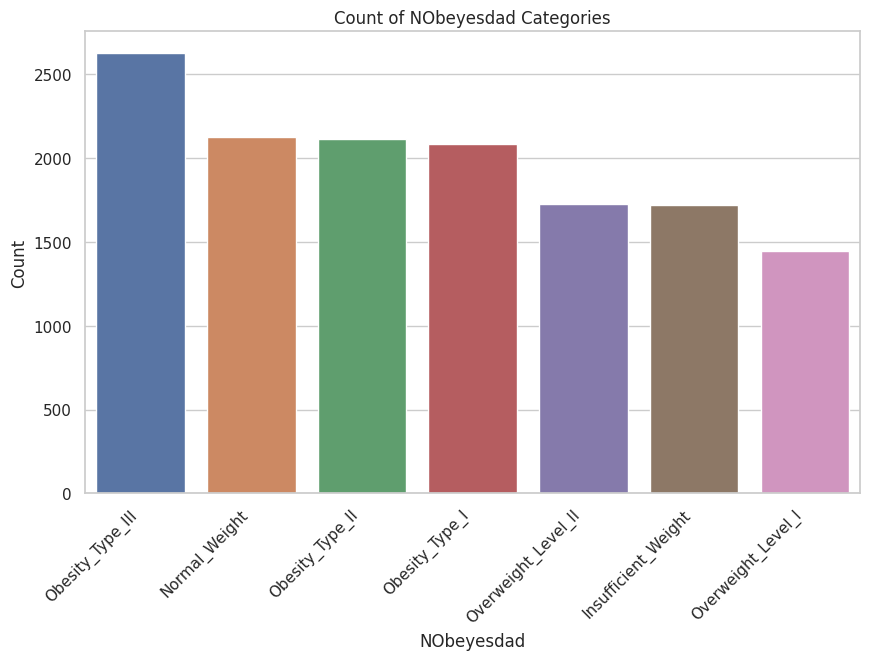

In [62]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=submission_df, x='NObeyesdad', order=submission_df['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.xlabel('NObeyesdad')
plt.ylabel('Count')
plt.title('Count of NObeyesdad Categories')
plt.show()